In [172]:
#import the libraries needed to visualise data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import seaborn as sns
from upsetplot import from_memberships, UpSet
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## 1. Individual demand plots

In [219]:
sns.set()
n = 50
date = '1218'
type = 'disruptions'
D = n*4
# testing set
c7_200 = pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_{type}_c_{n}.csv')
d7_200 = pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_{type}_d_{n}.csv')
c7_manu_200 = pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_{type}_c_manu_{n}.csv')
d7_manu_200 = pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_{type}_d_manu_{n}.csv')

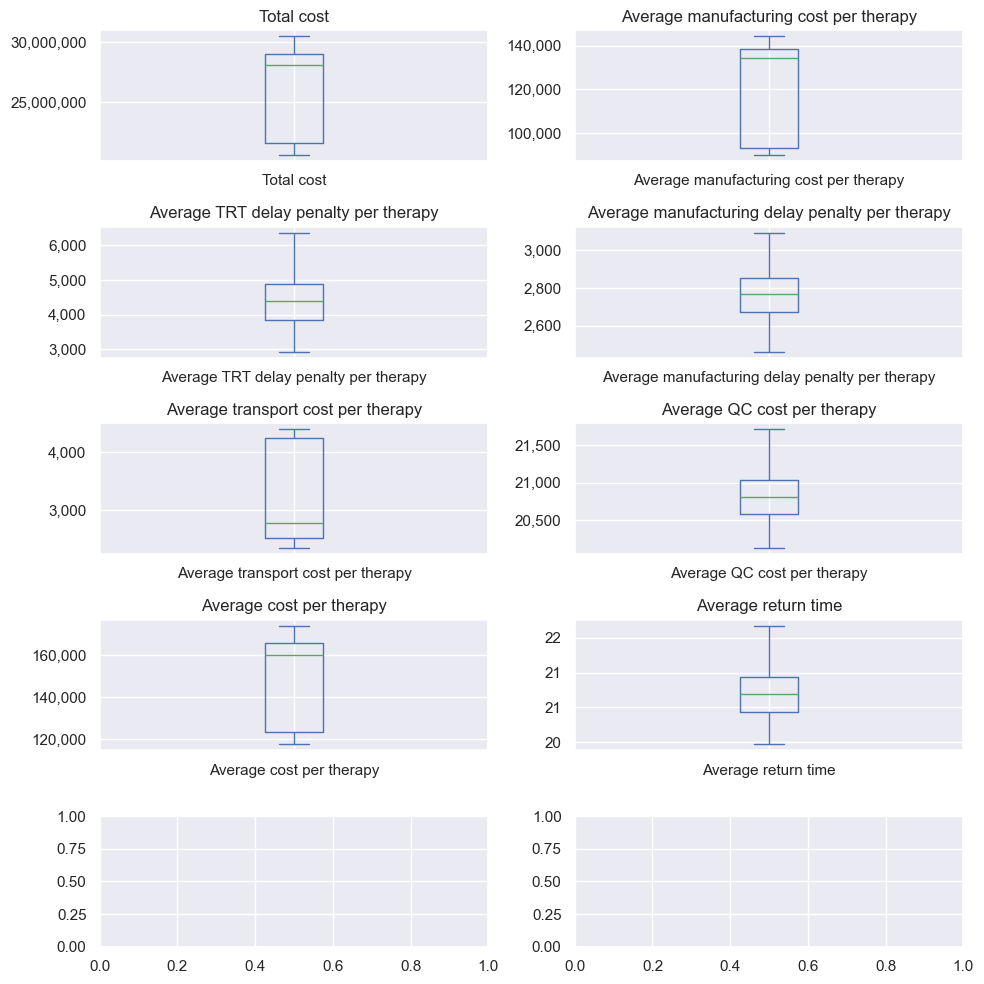

In [109]:
# Centralised boxplots
fig, ax = plt.subplots(5, 2, figsize=(10, 10))
for i, col in enumerate(c7_200.columns[1:]):
    c7_200[col].plot(kind='box', ax=ax[i//2, i%2], title=col)
    ax[i//2, i%2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()

# save the boxplot figures to a file
#fig.savefig('d7_200_boxplot.png')

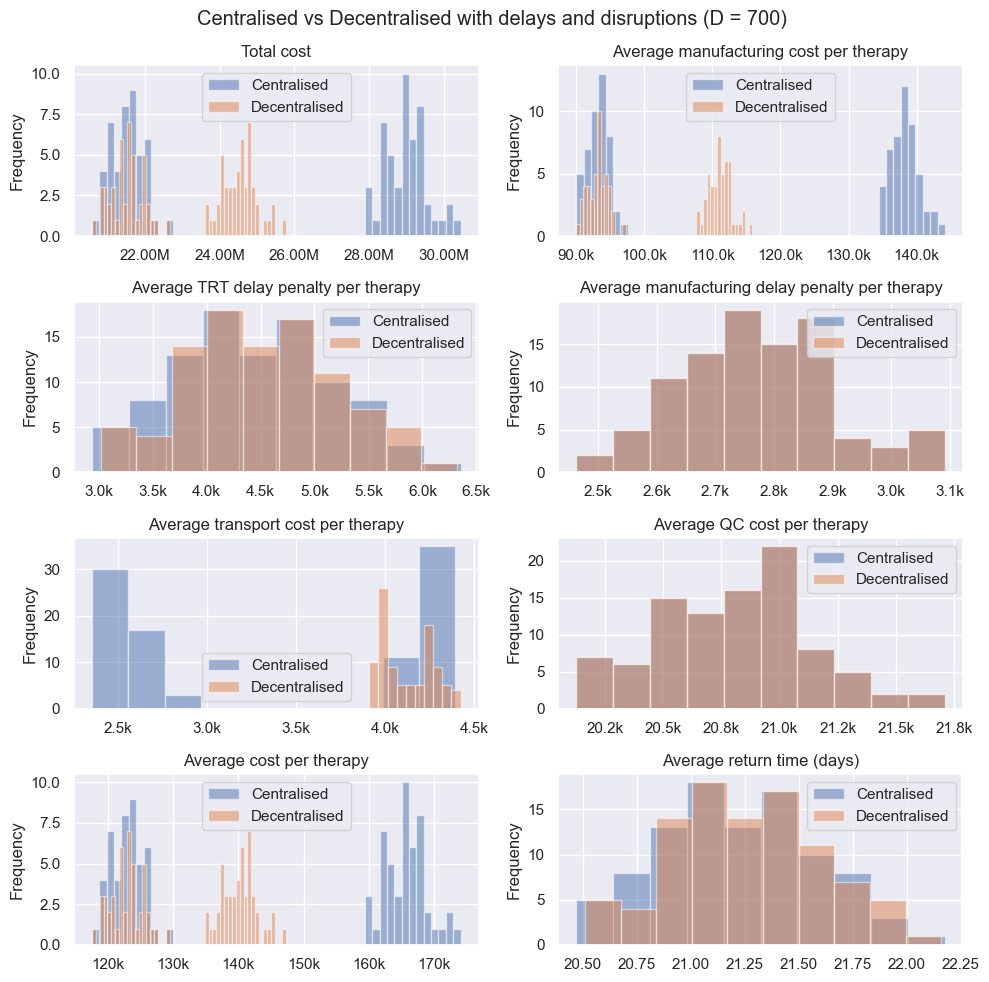

In [110]:
def millions_formatter(x, pos):
    return f'{x * 1e-6:.2f}M'

def thousands_formatter0(x, pos):
    return f'{x * 1e-3:.0f}k'

def thousands_formatter1(x, pos):
    return f'{x * 1e-3:.1f}k'
fig, ax = plt.subplots(4, 2, figsize=(10, 10))

# Plot for column 1
c7_200['Total cost'].plot(kind='hist', bins = 50, ax=ax[0, 0], title='Total cost', alpha=0.5, label='Centralised')
d7_200['Total cost'].plot(kind='hist', bins = 50, ax=ax[0, 0], title='Total cost', alpha=0.5, label='Decentralised')
ax[0, 0].legend()
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Plot for column 2
c7_200['Average manufacturing cost per therapy'].plot(kind='hist', bins = 50, ax=ax[0, 1], title='Average manufacturing cost per therapy', alpha=0.5, label='Centralised')
d7_200['Average manufacturing cost per therapy'].plot(kind='hist', bins = 50, ax=ax[0, 1], title='Average manufacturing cost per therapy', alpha=0.5, label='Decentralised')
ax[0, 1].legend()
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter1))

# Plot for column 3
c7_200['Average TRT delay penalty per therapy'].plot(kind='hist', ax=ax[1, 0], title='Average TRT delay penalty per therapy', alpha=0.5, label='Centralised')
d7_200['Average TRT delay penalty per therapy'].plot(kind='hist', ax=ax[1, 0], title='Average TRT delay penalty per therapy', alpha=0.5, label='Decentralised')
ax[1, 0].legend()
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter1))


# Plot for column 4
c7_200['Average manufacturing delay penalty per therapy'].plot(kind='hist', ax=ax[1, 1], title='Average manufacturing delay penalty per therapy', alpha=0.5, label='Centralised')
d7_200['Average manufacturing delay penalty per therapy'].plot(kind='hist', ax=ax[1, 1], title='Average manufacturing delay penalty per therapy', alpha=0.5, label='Decentralised')
ax[1, 1].legend()
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter1))

# Plot for column 5
c7_200['Average transport cost per therapy'].plot(kind='hist', ax=ax[2, 0], title='Average transport cost per therapy', alpha=0.5, label='Centralised')
d7_200['Average transport cost per therapy'].plot(kind='hist', ax=ax[2, 0], title='Average transport cost per therapy', alpha=0.5, label='Decentralised')
ax[2, 0].legend()
ax[2, 0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter1))

# Plot for column 6
c7_200['Average QC cost per therapy'].plot(kind='hist', ax=ax[2, 1], title='Average QC cost per therapy', alpha=0.5, label='Centralised')
d7_200['Average QC cost per therapy'].plot(kind='hist', ax=ax[2, 1], title='Average QC cost per therapy', alpha=0.5, label='Decentralised')
ax[2, 1].legend()
ax[2, 1].xaxis.set_major_formatter(FuncFormatter(thousands_formatter1))

# Plot for column 7
c7_200['Average cost per therapy'].plot(kind='hist', bins = 50, ax=ax[3, 0], title='Average cost per therapy', alpha=0.5, label='Centralised')
d7_200['Average cost per therapy'].plot(kind='hist', bins = 50, ax=ax[3, 0], title='Average cost per therapy', alpha=0.5, label='Decentralised')
ax[3, 0].legend()
ax[3, 0].xaxis.set_major_formatter(FuncFormatter(thousands_formatter0))

# Plot for column 8
c7_200['Average return time'].plot(kind='hist', ax=ax[3, 1], title='Average return time (days)', alpha=0.5, label='Centralised')
d7_200['Average return time'].plot(kind='hist', ax=ax[3, 1], title='Average return time (days)', alpha=0.5, label='Decentralised')
ax[3, 1].legend()

fig.suptitle(f'Centralised vs Decentralised with delays and disruptions (D = {D})')
plt.tight_layout()
plt.show()

# Save the histogram figures to a file
#fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_plots/{date}_cd6d7_{n}_hist.png')


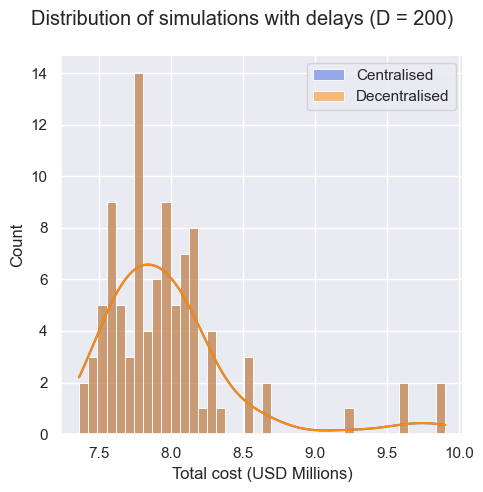

In [101]:

# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(c7_200['Total cost']/1e6, bins=40, kde=True, ax=ax, label='Centralised', alpha=0.5, edgecolor=None, color='royalblue')
sns.histplot(d7_200['Total cost']/1e6, bins=40, kde=True, ax=ax, label='Decentralised', alpha=0.5, edgecolor=None, color='darkorange')

# Add legend and titles
ax.legend()
ax.set_xlabel('Total cost (USD Millions)')
fig.suptitle(f'Distribution of simulations with delays (D = {D})')
plt.tight_layout()
plt.show()

# save the histogram to /Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/delays folder
fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_total_cost_hist.png')


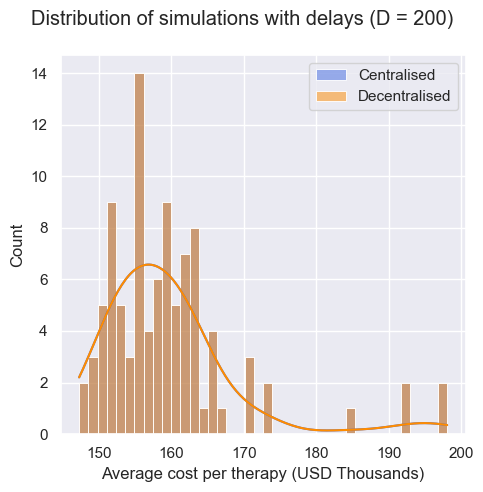

In [103]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(c7_200['Average cost per therapy']/1e3, bins=40, kde=True, ax=ax, label='Centralised',  alpha=0.5, edgecolor=None, color='royalblue')
sns.histplot(d7_200['Average cost per therapy']/1e3, bins=40, kde=True, ax=ax, label='Decentralised',  alpha=0.5, edgecolor=None, color='darkorange')

# Add legend and titles
ax.legend()
ax.set_xlabel('Average cost per therapy (USD Thousands)')
fig.suptitle(f'Distribution of simulations with delays (D = {D})')
plt.tight_layout()
plt.show()

fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_avg_cost_hist.png')

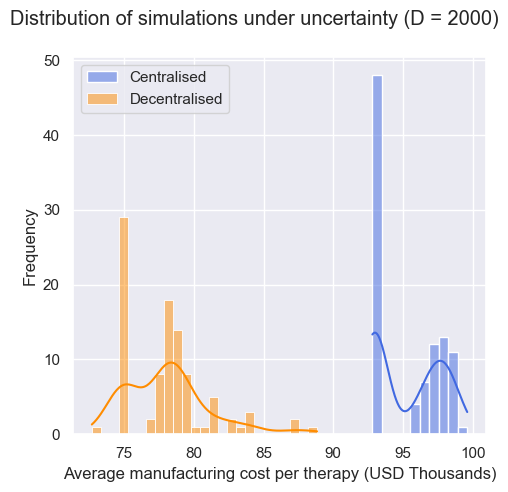

In [145]:
# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(c7_200['Average manufacturing cost per therapy']/1e3, bins=10, kde=True, ax=ax, label='Centralised', alpha=0.5, edgecolor=None, color='royalblue')
sns.histplot(d7_200['Average manufacturing cost per therapy']/1e3, bins=25, kde=True, ax=ax, label='Decentralised', alpha=0.5, edgecolor=None, color='darkorange')

#x_ticks = np.linspace(85, 135, 11)
# Add legend and titles
ax.legend()
ax.set_xlabel('Average manufacturing cost per therapy (USD Thousands)')
ax.set_ylabel('Frequency')
fig.suptitle(f'Distribution of simulations under uncertainty (D = {D})')
#ax.set_xticks(x_ticks)
#ax.set_xticklabels([f"{x:.0f}" for x in x_ticks])
plt.tight_layout()
plt.show()

fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_manu_cost_hist.png')

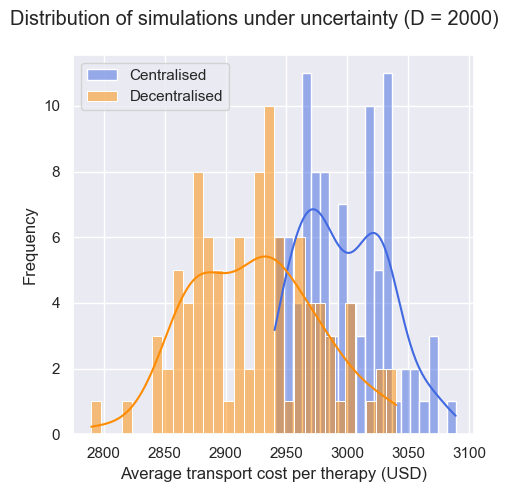

In [151]:

# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(c7_200['Average transport cost per therapy'], bins=20, kde=True, ax=ax, label='Centralised', alpha=0.5, edgecolor=None, color='royalblue')
sns.histplot(d7_200['Average transport cost per therapy'], bins=30, kde=True, ax=ax, label='Decentralised', alpha=0.5, edgecolor=None, color='darkorange')

# Add legend and titles
ax.legend()
ax.set_xlabel('Average transport cost per therapy (USD)')
ax.set_ylabel('Frequency')
fig.suptitle(f'Distribution of simulations under uncertainty (D = {D})')
plt.tight_layout()
plt.show()

fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_transport_cost_hist.png')


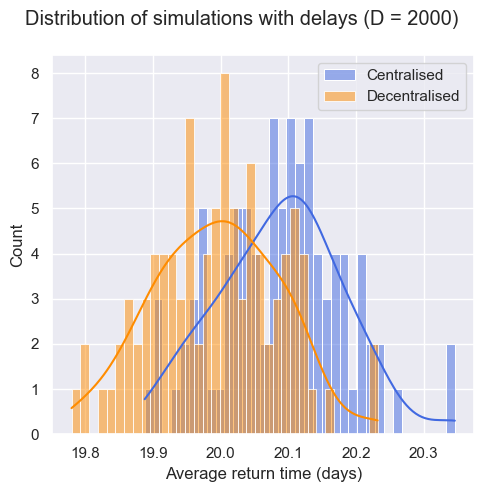

In [62]:

# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(c7_200['Average return time'], bins=35, kde=True, ax=ax, label='Centralised', alpha=0.5, edgecolor=None, color='royalblue')
sns.histplot(d7_200['Average return time'], bins=35, kde=True, ax=ax, label='Decentralised', alpha=0.5, edgecolor=None, color='darkorange')

# Add legend and titles
ax.legend()
ax.set_xlabel('Average return time (days)')
fig.suptitle(f'Distribution of simulations with delays (D = {D})')
plt.tight_layout()
plt.show()

fig.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_return_time_hist.png')

In [165]:
# plot the manufacturing data for the centralised and decentralised systems in one graph
# extract the data from c7_manu_200 and d7_manu_200 removing the first column
c7_sites = c7_manu_200.iloc[:, 1:]
d7_sites = d7_manu_200.iloc[:, 1:]

In [170]:
print('Centralised raw data')
print(np.shape(c7_sites))
print('Decentralised raw data')
print(np.shape(d7_sites))
#print(d7_sites.to_string())
c7_sites1 = c7_sites.copy()
d7_sites1 = d7_sites.copy()

# in c7_sites1, delete all rows with only zeros
c7_sites1 = c7_sites1[(c7_sites1.T != 0).any()]
print('centralised cleaned data')
print(np.shape(c7_sites1))
print(c7_sites1.to_string())

# in d7_sites1, delete all rows with only zeros
d7_sites1 = d7_sites1[(d7_sites1.T != 0).any()]
print('decentralised cleaned data')
print(np.shape(d7_sites1))
#print(d7_sites1.to_string())


Centralised raw data
(96, 6)
Decentralised raw data
(96, 6)
centralised cleaned data
(95, 6)
    m1  m2  m3  m4  m5  m6
0    1   0   0   1   0   0
1    1   0   0   1   0   0
2    1   0   0   1   0   0
3    1   0   0   1   0   0
4    1   0   0   1   0   0
5    1   0   0   1   0   0
6    1   0   0   1   0   0
7    1   0   0   1   0   0
8    0   0   1   0   0   0
9    1   0   0   1   0   0
10   1   0   0   1   0   0
11   1   0   0   1   0   0
12   1   0   0   1   0   0
13   1   0   0   1   0   0
14   1   0   0   1   0   0
15   1   0   0   1   0   0
16   1   0   0   1   0   0
17   0   0   0   1   0   0
18   1   0   0   1   0   0
19   1   0   0   1   0   0
21   1   0   0   1   0   0
22   1   0   0   1   0   0
23   1   0   0   1   0   0
24   1   0   0   1   0   0
25   1   0   0   1   0   0
26   1   0   0   1   0   0
27   1   0   0   1   0   0
28   1   0   0   1   0   0
29   1   0   0   1   0   0
30   1   0   0   1   0   0
31   1   0   0   1   0   0
32   1   0   0   1   0   0
33   1   0   0  

m1     m3     m4   
True   False  True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
False  True   False    1
True   False  True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
False  False  True     1
True   False  True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
              True     1
     

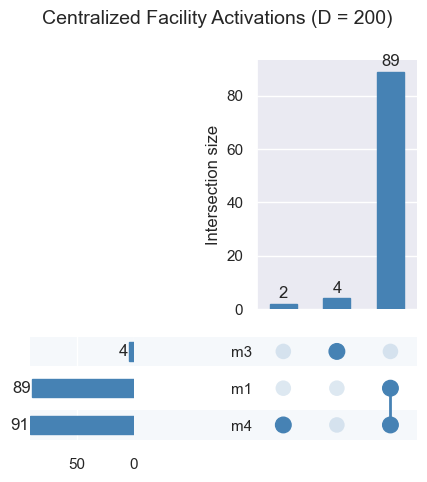

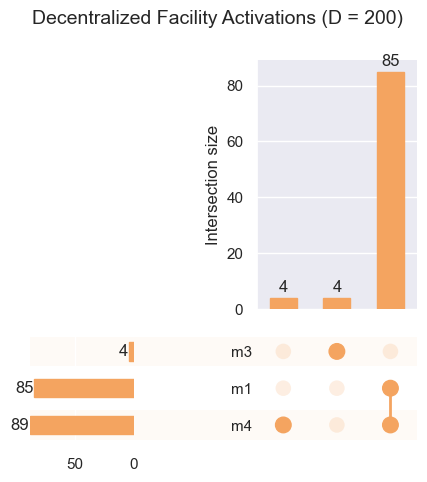

In [171]:
# Convert each row into a set of active facilities for centralized and decentralized systems
memberships_c = [
    frozenset([col for col, active in row.items() if active == 1]) for _, row in c7_sites1.iterrows()
]

memberships_d = [
    frozenset([col for col, active in row.items() if active == 1]) for _, row in d7_sites1.iterrows()
]

# Prepare data for UpSet plot for centralized and decentralized systems
upset_data_c = from_memberships(memberships_c)
upset_data_d = from_memberships(memberships_d)
print(upset_data_c.to_string())

# Create UpSet plots for centralized and decentralized systems
upset_c = UpSet(upset_data_c, subset_size='count', show_counts=True, facecolor='steelblue')
upset_d = UpSet(upset_data_d, subset_size='count', show_counts=True, facecolor='sandybrown')

# Plot centralized and decentralized facility activations
upset_c.plot()
plt.suptitle(f"Centralized Facility Activations (D = {D})", fontsize=14)
plt.gcf().set_size_inches(5, 5)
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_upset_c.png')
upset_d.plot()
plt.suptitle(f"Decentralized Facility Activations (D = {D})", fontsize=14)
plt.gcf().set_size_inches(5, 5)
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_upset_d.png')



Dummy  m2     m3     m6   
True   False  True   True     1
                     True     1
                     True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
       False  True   True     1
                     True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
                     False    1
       False  True   True     1
       True   False  False    1
                     False    1
                     False    1
       False  True   True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
                     False    1
       False  True   True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
       False  True   True     1
       True   False  False    1
                     False    1
             

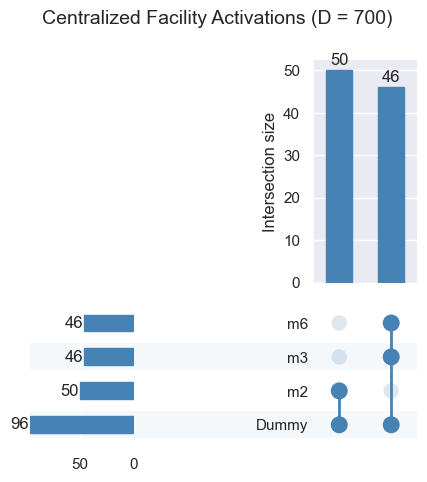

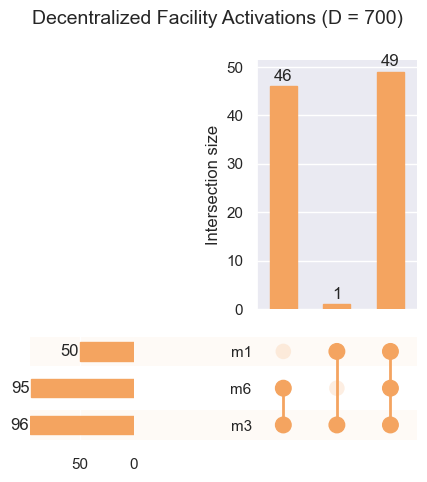

In [159]:
# Convert each row into a set of active facilities for centralized and decentralized systems
memberships_c = [
    frozenset([col for col, active in row.items() if active == 1]) for _, row in c7_sites1.iterrows()
]

memberships_d = [
    frozenset([col for col, active in row.items() if active == 1]) for _, row in d7_sites1.iterrows()
]
#memberships_c_with_dummy = [set(membership).union({"Dummy"}) for membership in memberships_c]
#memberships_d_with_dummy = [set(membership).union({"Dummy"}) for membership in memberships_d]

# Prepare data for UpSet plot with the dummy category
upset_data_c = from_memberships(memberships_c)
upset_data_d = from_memberships(memberships_d)

#upset_data_c = upset_data_c.loc[upset_data_c.index.difference(["Dummy"])]
#upset_data_d = upset_data_d.loc[upset_data_d.index.difference(["Dummy"])]

print(upset_data_c.to_string())

# Create UpSet plots for centralized and decentralized systems
upset_c = UpSet(upset_data_c, subset_size='count', show_counts=True, facecolor='steelblue')
upset_d = UpSet(upset_data_d, subset_size='count', show_counts=True, facecolor='sandybrown')

# Plot centralized and decentralized facility activations
upset_c.plot()
plt.suptitle(f"Centralized Facility Activations (D = {D})", fontsize=14)
plt.gcf().set_size_inches(5, 5)
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_upset_c.png')
upset_d.plot()
plt.suptitle(f"Decentralized Facility Activations (D = {D})", fontsize=14)
plt.gcf().set_size_inches(5, 5)
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_{D}_upset_d.png')



## 2. Plotting across demand levels

In [174]:
def load_delay_data(y, date):
    c7 = []
    d7 = []
    c7_manu = []
    d7_manu = []
    
    for value in y:
        c7.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_delays_c_{value}.csv'))
        d7.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_delays_d_{value}.csv'))
        c7_manu.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_delays_c_manu_{value}.csv'))
        d7_manu.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_delays_d_manu_{value}.csv'))
    
    return c7, d7, c7_manu, d7_manu

def load_disruption_data(y, date):
    c7_dis = []
    d7_dis = []
    c7_manu_dis = []
    d7_manu_dis = []
    
    for value in y:
        c7_dis.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_disruptions_c_{value}.csv'))
        d7_dis.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_disruptions_d_{value}.csv'))
        c7_manu_dis.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_disruptions_c_manu_{value}.csv'))
        d7_manu_dis.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_disruptions_d_manu_{value}.csv'))
    
    return c7_dis, d7_dis, c7_manu_dis, d7_manu_dis

def load_normal_data(y, date):
    c7_norm = []
    d7_norm = []
    c7_manu_norm = []
    d7_manu_norm = []
    
    for value in y:
        c7_norm.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_normal_c_{value}.csv'))
        d7_norm.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_normal_d_{value}.csv'))
        c7_manu_norm.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_normal_c_manu_{value}.csv'))
        d7_manu_norm.append(pd.read_csv(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/{date}/{date}_normal_d_manu_{value}.csv'))
    
    return c7_norm, d7_norm, c7_manu_norm, d7_manu_norm

In [178]:
y = [50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500]
y2 = [50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500]
y3 = [50, 75, 100, 125, 150, 175, 200, 225, 250, 300, 350, 400, 450, 500]
date = '1211'
c7, d7, c7_manu, d7_manu = load_delay_data(y, date)

date2 = '1218'
c7_dis, d7_dis, c7_manu_dis, d7_manu_dis = load_disruption_data(y2, date2)

date3 = '1303'
c7_norm, d7_norm, c7_manu_norm, d7_manu_norm = load_normal_data(y3, date3)


In [69]:
def generate_means(vector, column, y):
    means = []
    for i in range(len(y)):
        means.append(vector[i][column].mean())
    return means

def generate_stds(vector, column, y):
    stds = []
    for i in range(len(y)):
        stds.append(vector[i][column].std())
    return stds

def generate_median(vector, column, y):
    median = []
    for i in range(len(y)):
        median.append(vector[i][column].median())
    return median

def generate_normal(vector, column, y):
    normal = []
    for i in range(len(y)):
        normal.append(vector[i][column])
    return normal

columns = ['Total cost', 'Average manufacturing cost per therapy', 'Average cost per therapy', 'Average return time', 'Average TRT delay penalty per therapy', 'Average manufacturing delay penalty per therapy', 'Average transport cost per therapy', 'Average QC cost per therapy']

In [197]:
x = [50*4, 75*4, 100*4, 125*4, 150*4, 175*4, 200*4, 225*4, 250*4, 300*4, 350*4, 400*4, 450*4, 500*4]
x2 = [50*4, 75*4, 100*4, 125*4, 150*4, 175*4, 200*4, 225*4, 250*4, 300*4, 350*4, 400*4, 450*4, 500*4]
x3 = [50*4, 75*4, 100*4, 125*4, 150*4, 175*4, 200*4, 225*4, 250*4, 300*4, 350*4, 400*4, 450*4, 500*4]

def plot_shaded(c_vec, d_vec, c_fill, d_fill, y_title, title,  x = x):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot Centralised with shaded error area
    ax.plot(x, c_vec, label='Centralised', color='royalblue')
    ax.fill_between(x, 
                    [m - s for m, s in zip(c_vec, c_fill)],  # Lower bound
                    [m + s for m, s in zip(c_vec, c_fill)],  # Upper bound
                    color='royalblue', alpha=0.2)

    # Plot Decentralised with shaded error area
    ax.plot(x, d_vec, label='Decentralised', color='orange')
    ax.fill_between(x, 
                    [m - s for m, s in zip(d_vec, d_fill)],  # Lower bound
                    [m + s for m, s in zip(d_vec, d_fill)],  # Upper bound
                    color='orange', alpha=0.2)

    # Labels and legend
    ax.set_xlabel('Demand level')
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.legend()

    plt.show()
# Replace with actual data

def plot_errorbars(c_vec, d_vec, c_std, d_std, y_title, title, x = x):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Centralised data with error bars
    ax.errorbar(x, c_vec, yerr=c_std, label='Centralised', fmt='-o', capsize=5)

    # Decentralised data with error bars
    ax.errorbar(x, d_vec, yerr=d_std, label='Decentralised', fmt='-s', capsize=5)

    # Plot labels and legend
    ax.set_xlabel('Demand level')
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.legend()

    plt.show()



In [180]:
c_vec = []
d_vec = []
c_std = []
d_std = []
c_median = []
d_median = []

c_vec_dis = []
d_vec_dis = []
c_std_dis = []
d_std_dis = []
c_median_dis = []
d_median_dis = []

c_vec_norm = []
d_vec_norm = []

for i in range(len(columns)):
    c_vec.append(generate_means(c7, columns[i],y))
    d_vec.append(generate_means(d7, columns[i],y))
    c_std.append(generate_stds(c7, columns[i],y))
    d_std.append(generate_stds(d7, columns[i],y))
    c_median.append(generate_median(c7, columns[i],y))
    d_median.append(generate_median(d7, columns[i],y))
    c_vec_dis.append(generate_means(c7_dis, columns[i], y2))
    d_vec_dis.append(generate_means(d7_dis, columns[i], y2))
    c_std_dis.append(generate_stds(c7_dis, columns[i], y2))
    d_std_dis.append(generate_stds(d7_dis, columns[i], y2))
    c_median_dis.append(generate_median(c7_dis, columns[i], y2))
    d_median_dis.append(generate_median(d7_dis, columns[i], y2))
    c_vec_norm.append(generate_means(c7_norm, columns[i], y3))
    d_vec_norm.append(generate_means(d7_norm, columns[i], y3))


In [181]:
print(np.shape(c_vec[0]))
print(np.shape(c_vec_norm[0]))


(14,)
(14,)


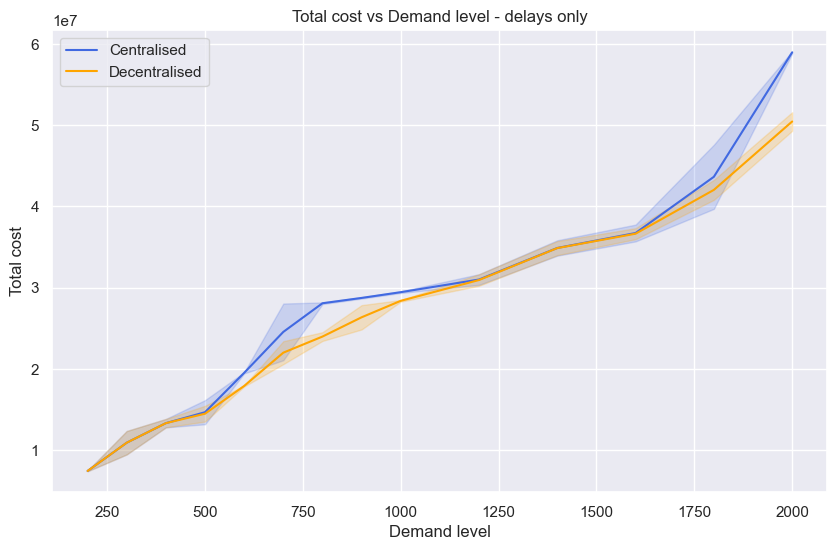

In [182]:
plot_shaded(c_vec[0], d_vec[0], c_std[0], d_std[0], 'Total cost', 'Total cost vs Demand level - delays only')

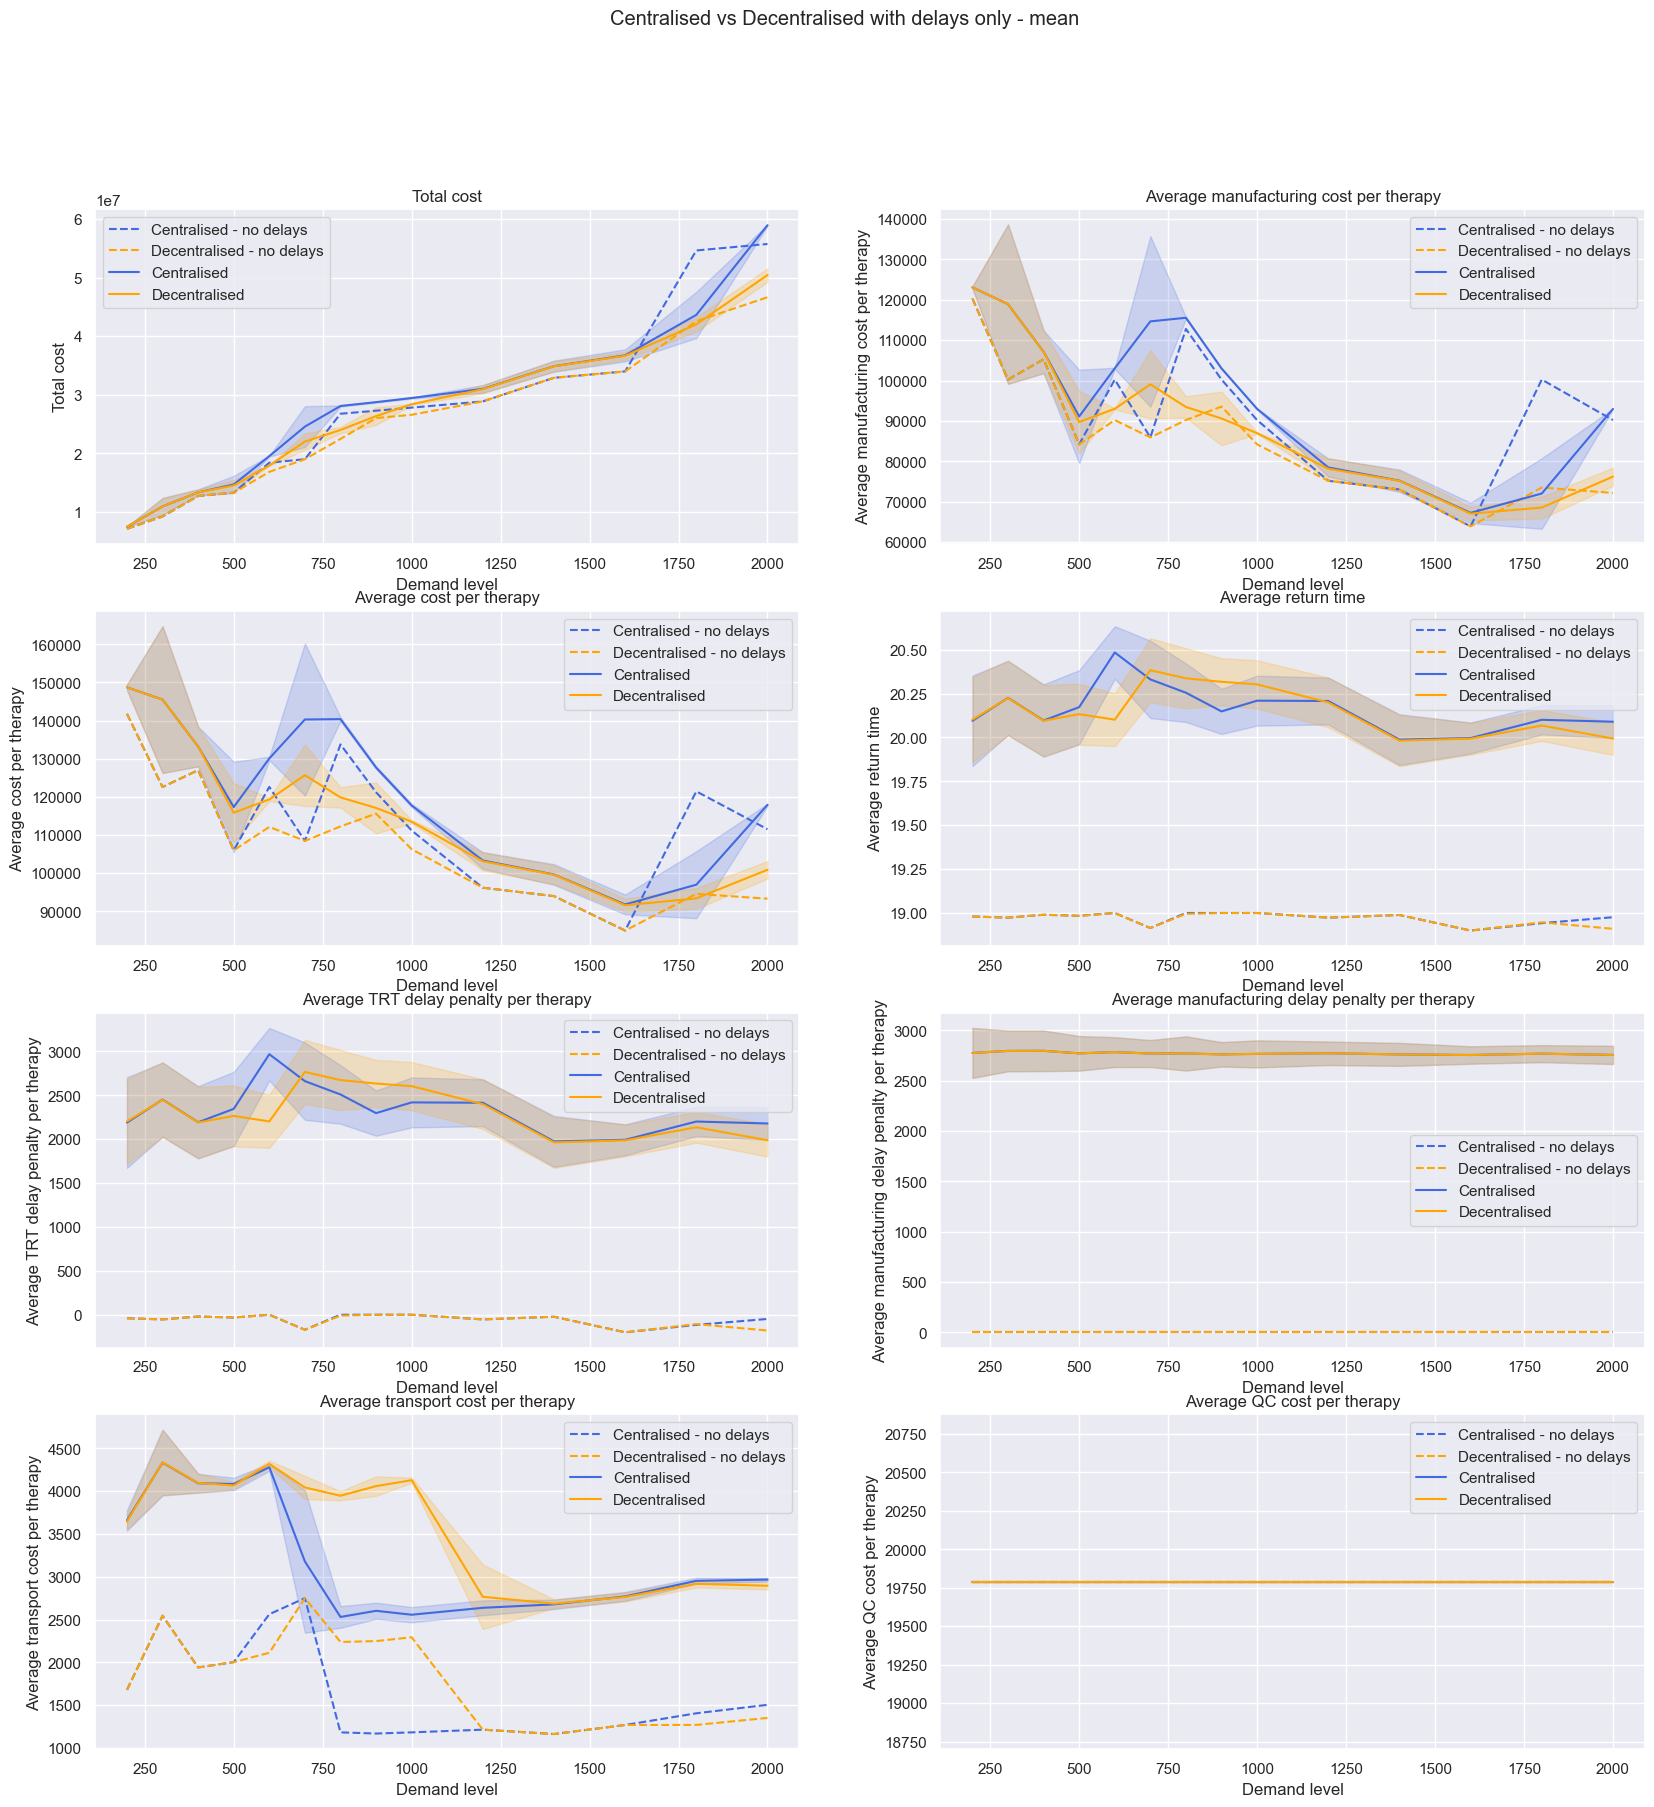

In [183]:
# for each column, plot the data with shaded error areas in 8 subplots
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# set the title of the figure
fig.suptitle(f'Centralised vs Decentralised with delays only - mean')

# for each column, plot the data with error bars
for i in range(len(columns)):
    ax[int(i/2), i%2].plot(x3, c_vec_norm[i], label='Centralised - no delays', color='royalblue', linestyle='dashed')
    ax[int(i/2), i%2].plot(x3, d_vec_norm[i], label='Decentralised - no delays', color='orange', linestyle='dashed')
    ax[int(i/2), i%2].plot(x, c_vec[i], label='Centralised', color='royalblue')
    ax[int(i/2), i%2].fill_between(x, 
                    [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                    [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                    color='royalblue', alpha=0.2)
    ax[int(i/2), i%2].plot(x, d_vec[i], label='Decentralised', color='orange')
    ax[int(i/2), i%2].fill_between(x, 
                    [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                    [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                    color='orange', alpha=0.2)
    ax[int(i/2), i%2].set_title(columns[i])
    ax[int(i/2), i%2].set_xlabel('Demand level')
    ax[int(i/2), i%2].set_ylabel(columns[i])
    ax[int(i/2), i%2].legend()


In [184]:
def plot_shaded_3(mode, y_title, title,  i, x = x):
    fig, ax = plt.subplots(figsize=(10, 6))

    if mode == 'delays':
        # Plot Centralised with shaded error area
        ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
        ax.fill_between(x, 
                        [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                        [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                        color='royalblue', alpha=0.2)

        # Plot Decentralised with shaded error area
        ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
        ax.fill_between(x, 
                        [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                        [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                        color='orange', alpha=0.2)
        


    elif mode == 'disruptions':
        ax.plot(x, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
        ax.fill_between(x, 
                        [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                        [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                        color='royalblue', alpha=0.2)
        ax.plot(x, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
        ax.fill_between(x, 
                        [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                        [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                        color='orange', alpha=0.2)

    # Plot the normal data
    ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
    ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
    # set major gridlines on x and y axes
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

    x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    # set x labels to x_label
    ax.set_xticks(x_label)
    def format_func(value, tick_number):
        return f"{int(value/(1e6)):,}"  # Format as integer with commas

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


    # Labels and legend
    ax.set_xlabel('Demand (patients)')
    ax.set_ylabel(y_title)
    ax.set_title(title)
    ax.legend()

    plt.show()

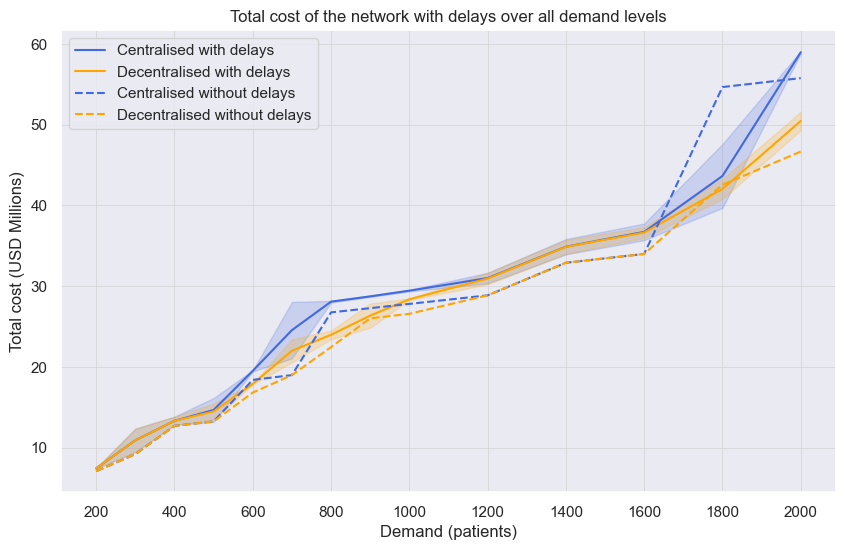

<Figure size 640x480 with 0 Axes>

In [185]:
plot_shaded_3('delays', 'Total cost (USD Millions)', 'Total cost of the network with delays over all demand levels', 0, x =x)
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_total_cost_delays.png')

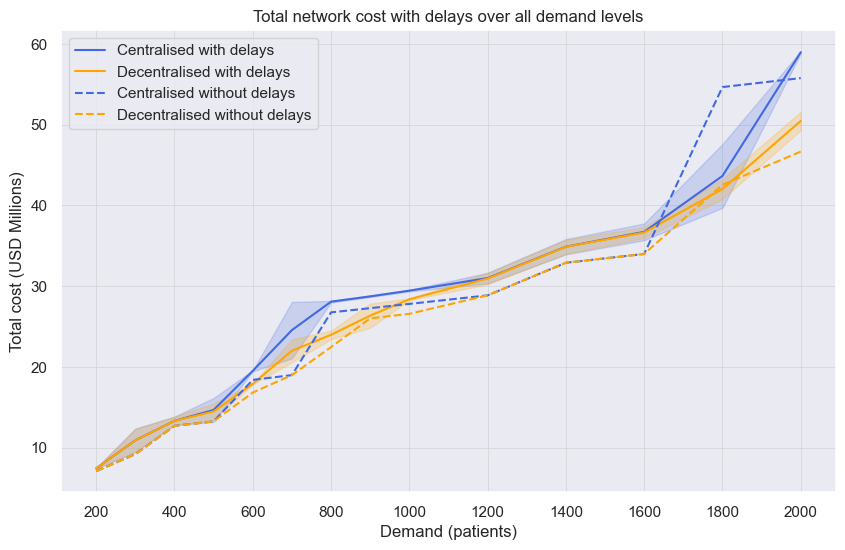

In [186]:
i = 0
y_title = 'Total cost (USD Millions)'
title = 'Total network cost with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e6)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_total_cost.png')
plt.show()



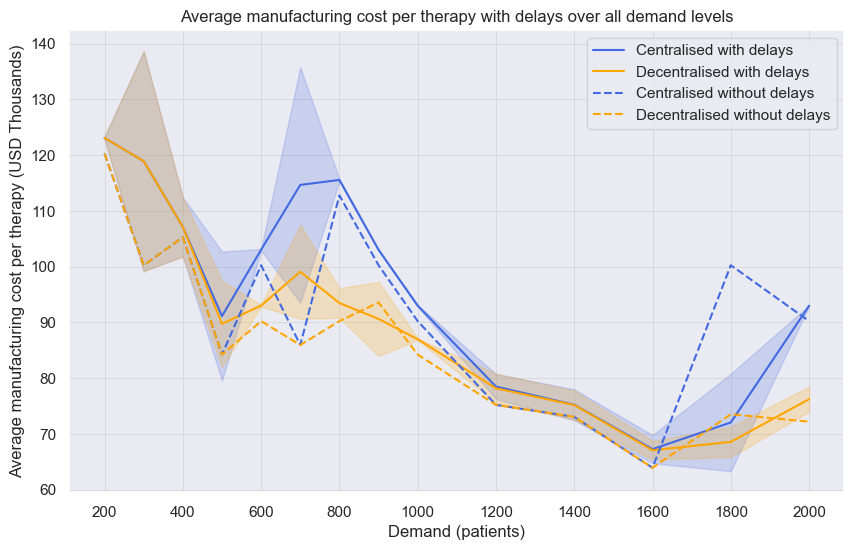

In [187]:
i = 1
y_title = 'Average manufacturing cost per therapy (USD Thousands)'
title = 'Average manufacturing cost per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e3)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_manu_cost.png')
plt.show()



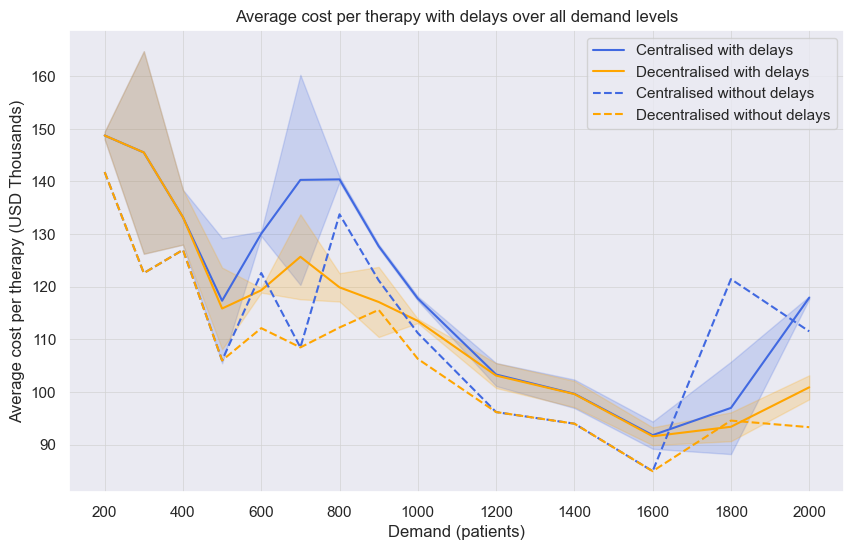

In [188]:
i = 2
y_title = 'Average cost per therapy (USD Thousands)'
title = 'Average cost per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e3)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_avg_cost.png')
plt.show()



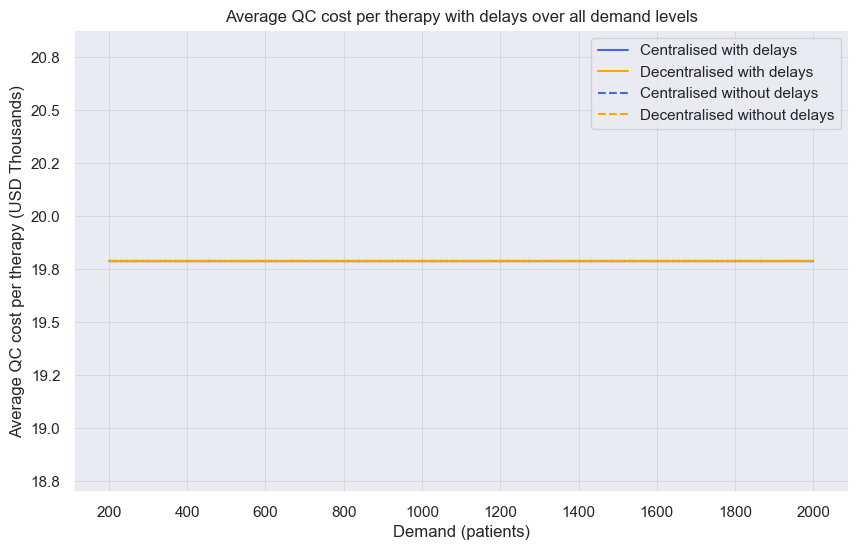

In [189]:
i = 7
y_title = 'Average QC cost per therapy (USD Thousands)'
title = 'Average QC cost per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value)/1e3:.1f}"  # Format as integer with commas
#return f'{x * 1e-3:.1f}k'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_QC_cost.png')
plt.show()



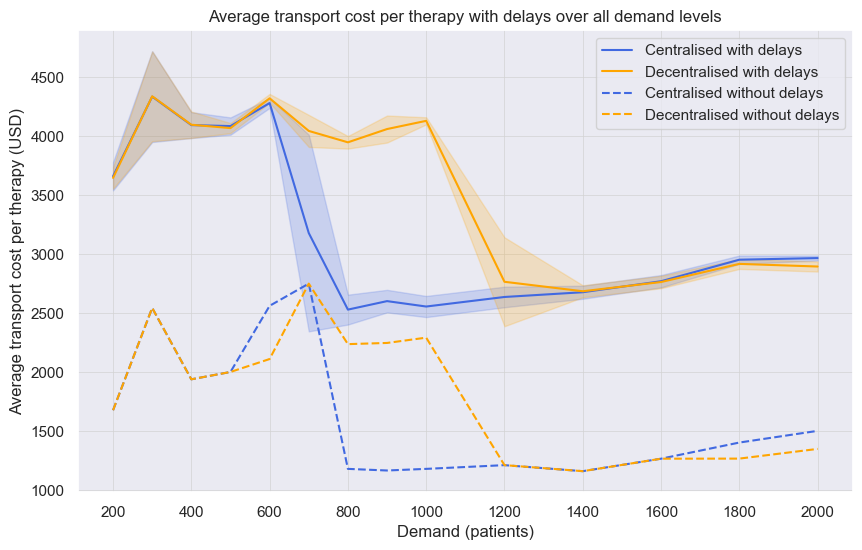

In [190]:
i = 6
y_title = 'Average transport cost per therapy (USD)'
title = 'Average transport cost per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value):.0f}"  # Format as integer with commas
#return f'{x * 1e-3:.1f}k'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_transport_cost.png')
plt.show()



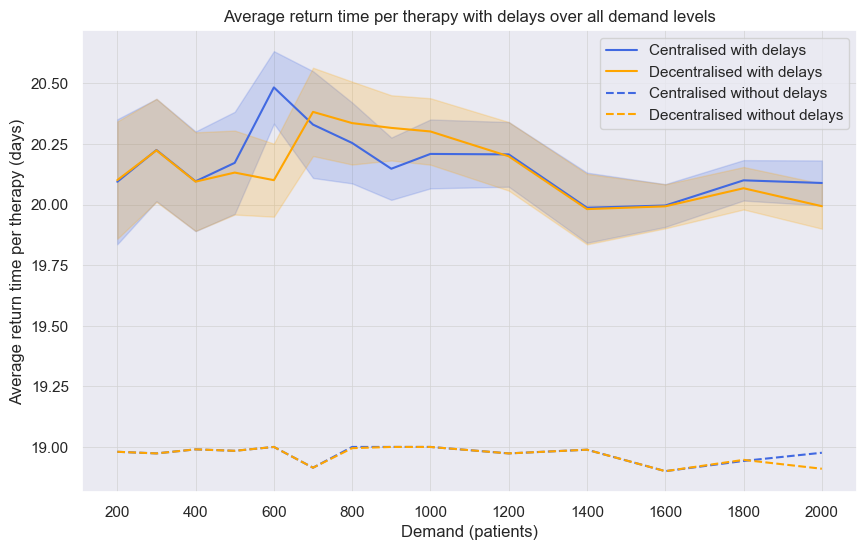

In [191]:
i = 3
y_title = 'Average return time per therapy (days)'
title = 'Average return time per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x, c_vec[i], label='Centralised with delays', color='royalblue')
ax.fill_between(x, 
                [m - s for m, s in zip(c_vec[i], c_std[i])],  # Lower bound
                [m + s for m, s in zip(c_vec[i], c_std[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x, d_vec[i], label='Decentralised with delays', color='orange')
ax.fill_between(x, 
                [m - s for m, s in zip(d_vec[i], d_std[i])],  # Lower bound
                [m + s for m, s in zip(d_vec[i], d_std[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{value:.2f}"  # Format as integer with commas
#return f'{x * 1e-3:.1f}k'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_return_time.png')
plt.show()



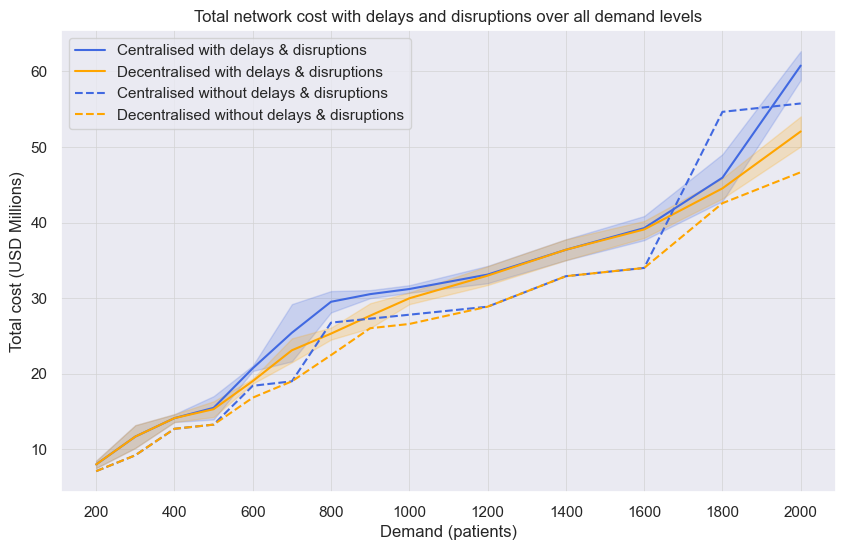

In [230]:
i = 0
y_title = 'Total cost (USD Millions)'
title = 'Total network cost with delays and disruptions over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x2, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
ax.fill_between(x2, 
                [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x2, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
ax.fill_between(x2, 
                [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays & disruptions', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays & disruptions', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e6)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_total_cost.png')
plt.show()



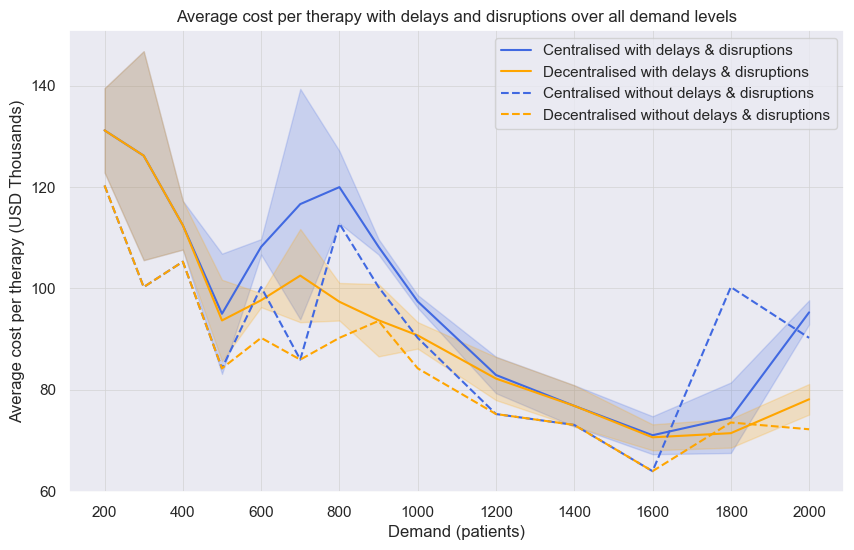

In [225]:
i = 1
y_title = 'Average cost per therapy (USD Thousands)'
title = 'Average cost per therapy with delays and disruptions over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x2, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
ax.fill_between(x2, 
                [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x2, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
ax.fill_between(x2, 
                [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays & disruptions', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays & disruptions', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e3)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_avg_cost.png')
plt.show()



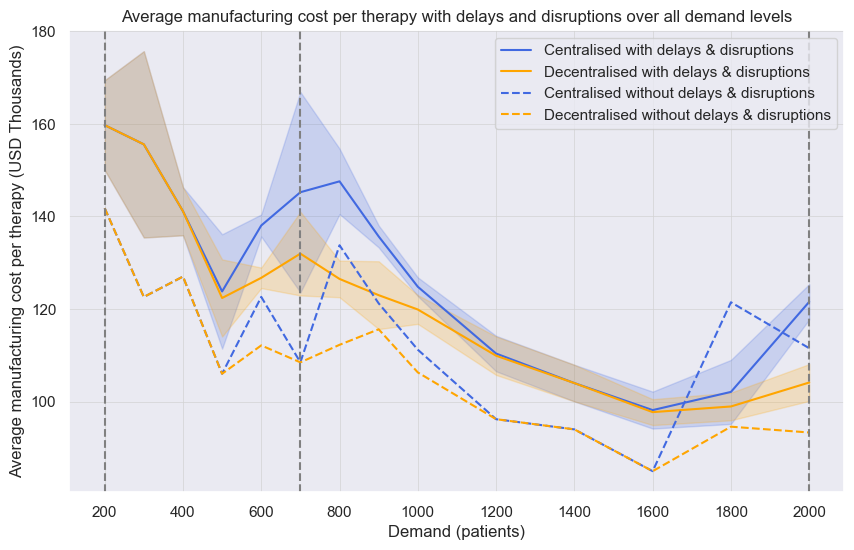

In [226]:
i = 2
y_title = 'Average manufacturing cost per therapy (USD Thousands)'
title = 'Average manufacturing cost per therapy with delays and disruptions over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x2, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
ax.fill_between(x2, 
                [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x2, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
ax.fill_between(x2, 
                [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays & disruptions', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays & disruptions', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e3)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Plotting vertical lines demand levels
ax.axvline(x = 200, color = 'grey', linestyle = '--')
ax.axvline(x = 700, color = 'grey', linestyle = '--')
ax.axvline(x = 2000, color = 'grey', linestyle = '--')

# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_manu_cost.png')
plt.show()



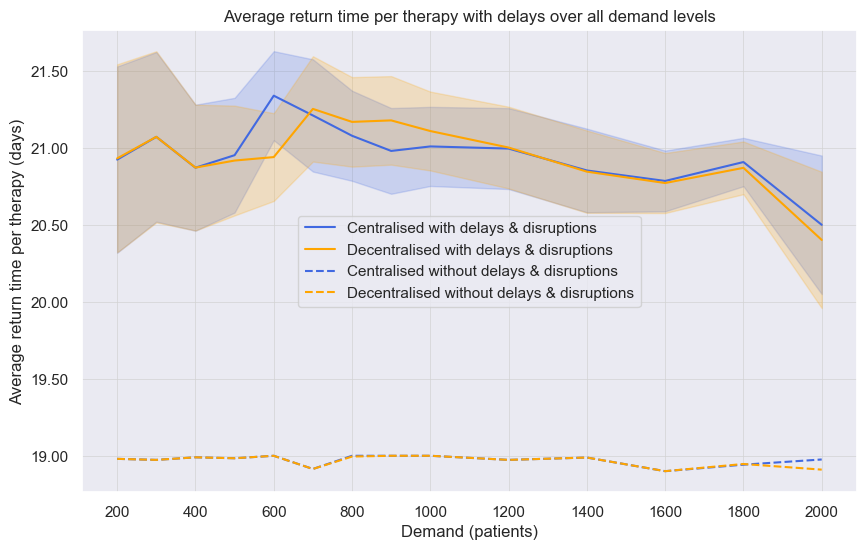

In [229]:
i = 3
y_title = 'Average return time per therapy (days)'
title = 'Average return time per therapy with delays over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x2, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
ax.fill_between(x2, 
                [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x2, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
ax.fill_between(x2, 
                [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays & disruptions', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays & disruptions', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{value:,.2f}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))


# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_return_time.png')
plt.show()



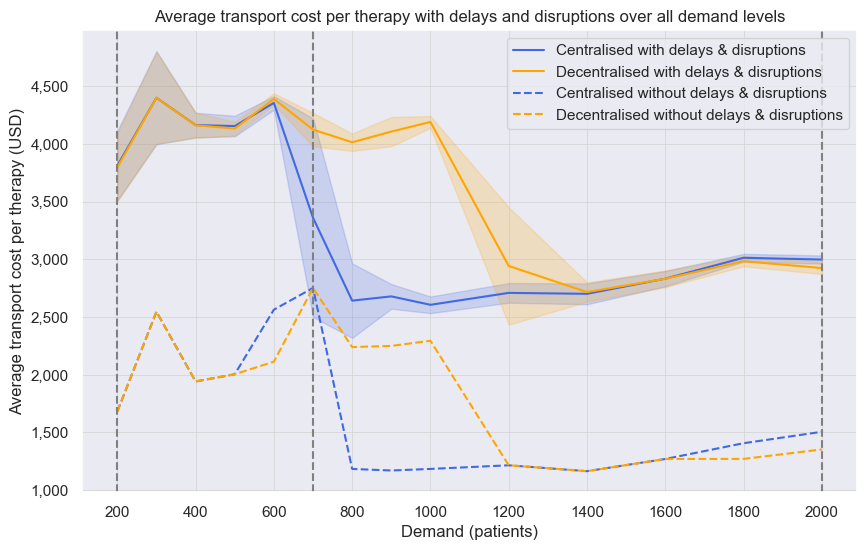

In [231]:
i = 6
y_title = 'Average transport cost per therapy (USD)'
title = 'Average transport cost per therapy with delays and disruptions over all demand levels'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Centralised with shaded error area
ax.plot(x2, c_vec_dis[i], label='Centralised with delays & disruptions', color='royalblue')
ax.fill_between(x2, 
                [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                color='royalblue', alpha=0.2)

 # Plot Decentralised with shaded error area
ax.plot(x2, d_vec_dis[i], label='Decentralised with delays & disruptions', color='orange')
ax.fill_between(x2, 
                [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                color='orange', alpha=0.2)
        

# Plot the normal data
ax.plot(x3, c_vec_norm[i], label='Centralised without delays & disruptions', color='royalblue', linestyle='dashed')
ax.plot(x3, d_vec_norm[i], label='Decentralised without delays & disruptions', color='orange', linestyle='dashed')
# set major gridlines on x and y axes
ax.grid(which='major', linestyle='-', linewidth='0.5', color='lightgrey')

x_label = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# set x labels to x_label
ax.set_xticks(x_label)
def format_func(value, tick_number):
    return f"{int(value/(1e0)):,}"  # Format as integer with commas

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Plotting vertical lines demand levels
ax.axvline(x = 200, color = 'grey', linestyle = '--')
ax.axvline(x = 700, color = 'grey', linestyle = '--')
ax.axvline(x = 2000, color = 'grey', linestyle = '--')
# Labels and legend
ax.set_xlabel('Demand (patients)')
ax.set_ylabel(y_title)
ax.set_title(title)
ax.legend()
plt.savefig(f'/Users/josiebecker/Desktop/Thesis/Model/Git_Model/thesis_jgbecker/Int_results/graphs/{date}_transport_cost.png')
plt.show()



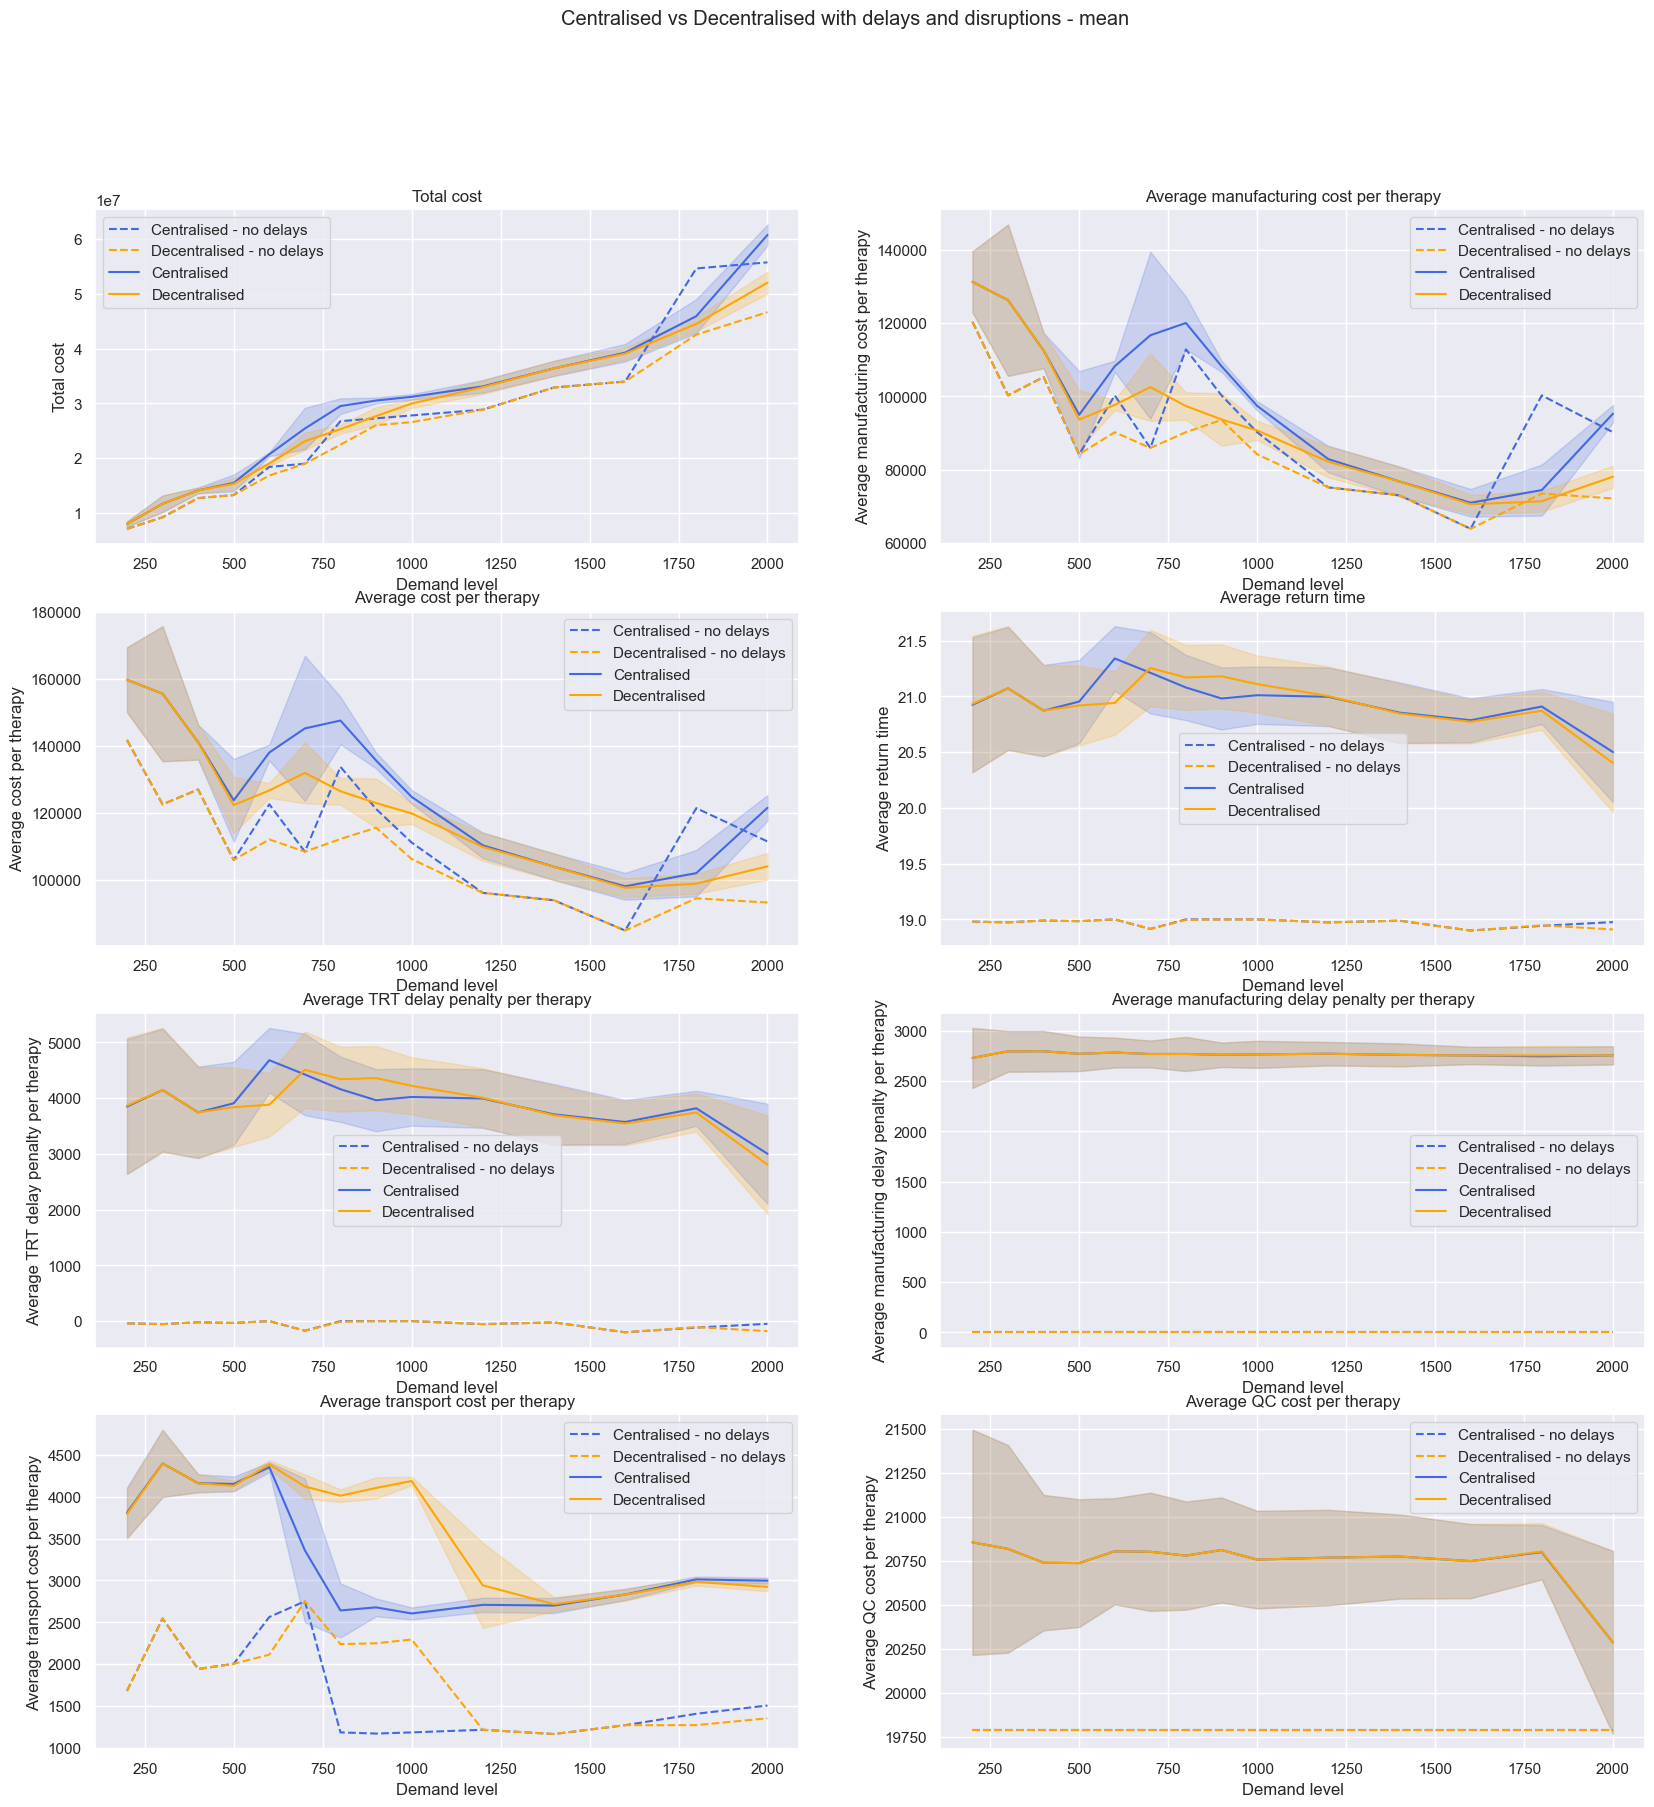

In [203]:
# for each column, plot the data with shaded error areas in 8 subplots
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

# set the title of the figure
fig.suptitle(f'Centralised vs Decentralised with delays and disruptions - mean')

# for each column, plot the data with error bars
for i in range(len(columns)):
    ax[int(i/2), i%2].plot(x3, c_vec_norm[i], label='Centralised - no delays', color='royalblue', linestyle='dashed')
    ax[int(i/2), i%2].plot(x3, d_vec_norm[i], label='Decentralised - no delays', color='orange', linestyle='dashed')
    ax[int(i/2), i%2].plot(x2, c_vec_dis[i], label='Centralised', color='royalblue')
    ax[int(i/2), i%2].fill_between(x2, 
                    [m - s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Lower bound
                    [m + s for m, s in zip(c_vec_dis[i], c_std_dis[i])],  # Upper bound
                    color='royalblue', alpha=0.2)
    ax[int(i/2), i%2].plot(x2, d_vec_dis[i], label='Decentralised', color='orange')
    ax[int(i/2), i%2].fill_between(x2, 
                    [m - s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Lower bound
                    [m + s for m, s in zip(d_vec_dis[i], d_std_dis[i])],  # Upper bound
                    color='orange', alpha=0.2)
    ax[int(i/2), i%2].set_title(columns[i])
    ax[int(i/2), i%2].set_xlabel('Demand level')
    ax[int(i/2), i%2].set_ylabel(columns[i])
    ax[int(i/2), i%2].legend()
